## 1. Import csv and lib

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from collections import  Counter
import cv2

# !!!Pls change below as your local path
df = pd.read_csv('train.csv')


## 2. Read the pic from jupyter

In [7]:

# !!!Pls change below as your local path
DATA_DIR = 'data/'



ori = []
for i in range(len(df)):
    file = df.loc[i].ImageID
    pic = cv2.imread(DATA_DIR + file)
    ori.append(pic)
    if i%500==499:
              print('%d uploaded.'%(i+1))
    # if i%3000==2999:
    #   np.save('Train_image_batch_%d'%(i/3000+1),ori[i-2999:])

file='Train_image'
np.save(file,ori)


500 uploaded.
1000 uploaded.
1500 uploaded.
2000 uploaded.
2500 uploaded.
3000 uploaded.
3500 uploaded.
4000 uploaded.
4500 uploaded.
5000 uploaded.
5500 uploaded.
6000 uploaded.
6500 uploaded.
7000 uploaded.
7500 uploaded.
8000 uploaded.
8500 uploaded.
9000 uploaded.
9500 uploaded.
10000 uploaded.
10500 uploaded.
11000 uploaded.
11500 uploaded.
12000 uploaded.
12500 uploaded.
13000 uploaded.
13500 uploaded.
14000 uploaded.
14500 uploaded.
15000 uploaded.
15500 uploaded.
16000 uploaded.
16500 uploaded.
17000 uploaded.
17500 uploaded.
18000 uploaded.
18500 uploaded.
19000 uploaded.
19500 uploaded.
20000 uploaded.
20500 uploaded.
21000 uploaded.
21500 uploaded.
22000 uploaded.
22500 uploaded.
23000 uploaded.
23500 uploaded.
24000 uploaded.
24500 uploaded.
25000 uploaded.
25500 uploaded.
26000 uploaded.
26500 uploaded.
27000 uploaded.
27500 uploaded.
28000 uploaded.
28500 uploaded.
29000 uploaded.
29500 uploaded.
30000 uploaded.


## 3. Check the size range of all the 30000 pics

Min row:  25
Max row:  320
Min column:  36
Max column:  320


(array([4.0000e+00, 1.0000e+01, 3.2000e+01, 4.4000e+01, 4.4600e+02,
        9.1400e+02, 2.7290e+03, 5.2520e+03, 1.8200e+02, 2.0387e+04]),
 array([ 36. ,  64.4,  92.8, 121.2, 149.6, 178. , 206.4, 234.8, 263.2,
        291.6, 320. ]),
 <a list of 10 Patch objects>)

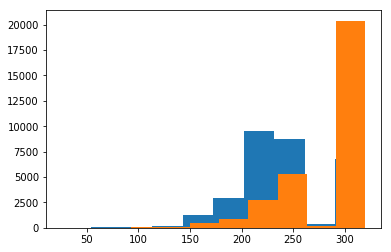

In [9]:
img=np.load(file+'.npy',allow_pickle=True)

dim0=[i.shape[0] for i in img]
dim1=[i.shape[1] for i in img]
print('Min row: ',min(dim0))
print('Max row: ',max(dim0))
print('Min column: ',min(dim1))
print('Max column: ',max(dim1))

plt.hist(dim0)
plt.hist(dim1)

## 4. Resize original image data and save it as .npy, ready for google drive uploading


In [10]:
h=30  # Height 
w=30  # Width 
resize_file='Train_image_%d_%d'%(h,w)  # npy file name after resize

# resize 
img_resize = []
for i in img:
        i = cv2.resize(i,(w,h))
        img_resize.append(i.astype(np.float32))

np.save(resize_file,img_resize)     # save npy file to local, ready to upload to google drive

## 5. EDA

### 5.1. Plot images before and after resize 

After resize:  (30000, 30, 30, 3)


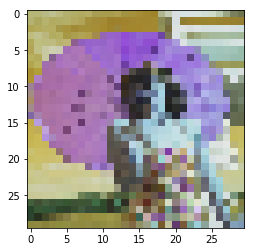

In [14]:
X=np.load(resize_file+'.npy',allow_pickle=True)

index=0
print('After resize: ',X.shape)
plt.imshow(X[index].astype(np.int))

Below is the orginal pic:


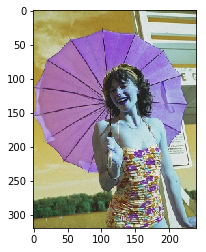

In [13]:
# plot the original img
print('Below is the orginal pic:')
plt.imshow(img[index])

### 5.2. All Classes distribution 


Text(0, 0.5, 'Value count')

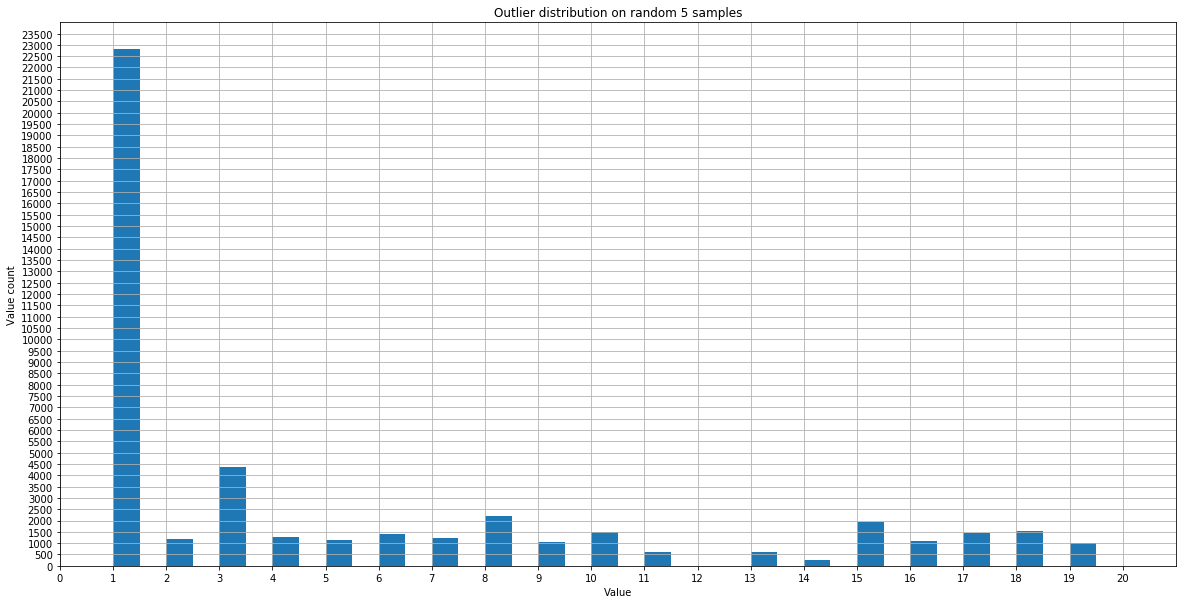

In [15]:
labels = df['Labels'].tolist()
count_label=[int(i) for i in ' '.join(labels).split()]
Counter(count_label)

# 以下是画label组合分布的直方图，super
# ==========================
bin=np.arange(0,21,0.5)
plt.hist(count_label,bin)
plt.axis([0, 21, 0, 24000])
    
# drawing graph
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10,forward=True)
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10) 
my_x_ticks = np.arange(0, 21, 1) 
my_y_ticks = np.arange(0, 24000, 500) 
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.grid()
plt.title('Outlier distribution on random 5 samples')
plt.xlabel('Value')
plt.ylabel('Value count')


### 5.3. Multi-label combination and 

In [24]:
label_combination=[]
label_list=[]
remove_1_combination=[]

for label in labels:
    num_label=[int(i) for i in label.split()]
    label_list.append(sorted(num_label))
    sort_label=[str(i)for i in sorted(num_label)]
    label_combination.append(' '.join(sort_label))
    
    # Since class 1 is dominant, so the distribution is unblance, so 
    num_label_remove1=[int(i) for i in label.split() if int(i)!=1]
    sort_label_remove1=[str(i)for i in sorted(num_label_remove1)]
    remove_1_combination.append(' '.join(sort_label_remove1))

    
print('Quantity of labels combination: ',len(set(label_combination)))
print()

# Counter(label_combination)
top_fre=100
print('Top %d frequent combination:'%top_fre)
Counter(label_combination).most_common(top_fre)



Quantity of labels combination:  714

Top 100 frequent combination:


[('1', 14075),
 ('17', 975),
 ('1 15', 876),
 ('1 3', 740),
 ('16', 673),
 ('18', 585),
 ('5', 552),
 ('1 19', 474),
 ('7', 471),
 ('1 9', 466),
 ('1 18', 419),
 ('1 4', 409),
 ('1 7', 343),
 ('15', 289),
 ('19', 280),
 ('1 3 8', 265),
 ('1 6', 258),
 ('1 2', 257),
 ('1 8', 250),
 ('9', 218),
 ('1 5', 210),
 ('1 17', 209),
 ('13', 200),
 ('11', 187),
 ('10', 187),
 ('1 3 6', 178),
 ('3', 173),
 ('8', 158),
 ('4', 137),
 ('1 16', 135),
 ('1 3 4', 129),
 ('1 3 10', 128),
 ('6', 110),
 ('3 10', 102),
 ('3 8', 100),
 ('1 2 3', 100),
 ('1 3 15', 97),
 ('1 5 8', 91),
 ('1 3 8 10', 90),
 ('1 10', 83),
 ('1 3 6 10', 79),
 ('7 10', 67),
 ('1 11', 66),
 ('3 6', 65),
 ('5 8', 65),
 ('2', 65),
 ('1 3 4 8', 64),
 ('3 8 10', 59),
 ('3 13', 59),
 ('3 11', 56),
 ('17 18', 56),
 ('3 14', 52),
 ('1 15 18', 51),
 ('1 7 15', 49),
 ('1 3 6 8', 44),
 ('3 7', 42),
 ('14', 42),
 ('1 2 15', 42),
 ('15 17', 41),
 ('1 13', 41),
 ('3 18', 40),
 ('3 17', 40),
 ('1 3 19', 40),
 ('1 2 4', 40),
 ('1 3 13', 39),
 ('1 

In [27]:
print('Quantity of labels combination after remove class 1: ',len(set(remove_1_combination)))
print()
print('Top %d frequent combination after remove class 1:'%top_fre)
Counter(remove_1_combination).most_common(top_fre)



Quantity of labels combination after remove class 1:  507

Top 100 frequent combination after remove class 1:


[('', 14075),
 ('17', 1184),
 ('15', 1165),
 ('18', 1004),
 ('3', 913),
 ('7', 814),
 ('16', 808),
 ('5', 762),
 ('19', 754),
 ('9', 684),
 ('4', 546),
 ('8', 408),
 ('6', 368),
 ('3 8', 365),
 ('2', 322),
 ('10', 270),
 ('11', 253),
 ('3 6', 243),
 ('13', 241),
 ('3 10', 230),
 ('3 4', 156),
 ('5 8', 156),
 ('3 8 10', 149),
 ('3 15', 113),
 ('2 3', 111),
 ('7 10', 100),
 ('3 13', 98),
 ('3 6 10', 93),
 ('3 11', 92),
 ('3 4 8', 84),
 ('3 14', 81),
 ('15 18', 74),
 ('17 18', 72),
 ('3 18', 70),
 ('3 6 8', 69),
 ('3 7', 63),
 ('3 5 8', 62),
 ('7 15', 59),
 ('9 16', 58),
 ('14', 56),
 ('6 8', 54),
 ('3 5', 53),
 ('3 19', 53),
 ('2 15', 53),
 ('3 6 8 10', 51),
 ('2 4', 50),
 ('3 17', 48),
 ('15 17', 48),
 ('15 16', 48),
 ('9 15', 43),
 ('3 8 13', 42),
 ('4 8', 42),
 ('9 18', 40),
 ('3 9', 34),
 ('8 18', 32),
 ('6 10', 32),
 ('2 3 10', 31),
 ('2 6', 31),
 ('18 19', 29),
 ('2 18', 28),
 ('2 3 4', 28),
 ('3 8 11', 27),
 ('8 10', 27),
 ('5 9', 26),
 ('2 3 8', 25),
 ('6 15', 25),
 ('2 3 6', 25)